In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
class SpringMass:

    '''
    Initialize class instance using initial position, initial velocity, and step size as
    required input. It also takes optional attributes, which are the length of the spring,
    the mass of the bob, the spring constant, and the damping value.
    '''
    def __init__(self, x0, v0, dt, length = 3, mass = 0.25, k = 42, b = 0):
        
        self.xs = [x0]          # list of positions
        self.vs = [v0]          # list of velocities
        self.ts = [0]           # list of time steps     
        self.dt = dt            # step size of simulation
        self.L  = length        # real length of spring (not stretched)
        self.m  = mass          # mass of object
        self.k  = k             # spring constant
        self.b  = b             # damping value beta


            
    '''
    This function defines Runge Kutta 4, a numerical method with order 4 for solving the system. 
    This is a general update function using RK4 that can be used for any ODE. It takes as input 
    an ODE that we wish to solve and the current time step and variable values. It returns the 
    next value the variable should be at. It can also take a tuple of variables to solve for.
    '''
    def update_rk4(self, f, ti, yi):
        dt = self.dt
        k1 = f(ti, yi)
        k2 = f(ti + dt/2, yi + (1/2)*dt*k1)
        k3 = f(ti + dt/2, yi + (1/2)*dt*k2)
        k4 = f(ti + dt, yi + dt*k3)
        y_next = yi + dt*(k1 + 2*k2 + 2*k3 + k4)/6
        return y_next

    

    '''
    This function returns the ODEs of the spring mass system as a system of equations. These 
    derivatives are going to be used with the general RK4 function. This function returns an
    array with the equations for computing the state of the system, which on this case are the
    derivatives of position and velocity.
    '''
    def derivs(self, t, state):
        position, velocity = state[0], state[1]
        posPrime = velocity
        velPrime = -self.k*position/self.m - self.b*velocity/self.m
        return np.array((posPrime, velPrime))
    
    
    
    '''
    This function updates the system n times using RK4. It also appends the updated values to 
    their respective lists to keep track of the variable values for plotting the evolution of
    the system with time.
    '''
    def update(self, n = 1):
        for _ in range(n):
            states = self.update_rk4(self.derivs, self.ts[-1], (self.xs[-1], self.vs[-1]))
            self.ts.append(self.ts[-1] + self.dt)
            self.xs.append(states[0])
            self.vs.append(states[1])



    '''
    This function makes three plots aligned side by side:
    - position vs time plot
    - velocity vs time plot
    - position vs velocity plot (A.K.A. phase space)
    '''
    def display_plots(self):
        %matplotlib inline
        fig, axs = plt.subplots(1, 3, figsize = (16, 4))
        axs[0].plot(self.ts, self.xs)
        axs[1].plot(self.ts, self.vs)
        axs[2].plot(self.xs, self.vs)
        axs[0].set_title("Time vs Position")
        axs[1].set_title("Time vs Velocity")
        axs[2].set_title("Position vs Velocity")
        plt.show()
        

In [3]:
# Initialize system
x0 = 5
v0 = 0
b = 1
dt = 0.001
sys = SpringMass(x0, v0, dt, b=b)

#############
# ANIMATION #
#############

%matplotlib notebook

# create figure and axis for drawing
fig    = plt.figure(figsize =(3,3))
ax     = plt.subplot(xlim = (-sys.xs[0]*2, sys.xs[0]*2), ylim = (-5, 5))

# initialize drawing objects to initial values
ax.vlines(0, -2, 2, ls = 'dotted')
bob,    = ax.plot([sys.xs[-1], 0], ms = 20, color = 'red', marker = 's')  
spring, = ax.plot([0, sys.xs[-1]], [0, 0], color = 'blue')

# define update function for animation
def animate(i):
    sys.update(n=5)
    bob.set_data(sys.xs[-1], 0)
    spring.set_data([0, sys.xs[-1]], [0, 0])
    return bob, spring
    
# run animation
ani = animation.FuncAnimation(fig, animate, np.arange(1, 500), interval = 1, blit = True)
plt.show()

<IPython.core.display.Javascript object>

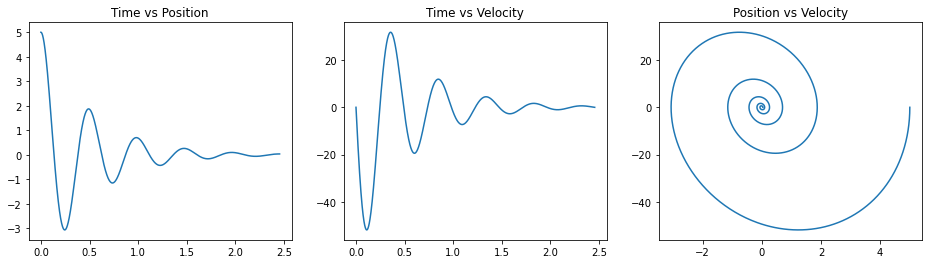

In [4]:
sys.display_plots()